In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

### Data Exploration

In [2]:
retail_df = pd.read_excel("online_retail_II.xlsx", sheet_name = 0)

retail_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
retail_df.describe()

,Quantity,Price,Customer ID
count,525461.00,525461.00,417534.00
mean,10.34,4.69,15360.65
std,107.42,146.13,1680.81
min,-9600.00,-53594.36,12346.00
25%,1.00,1.25,13983.00
50%,3.00,2.10,15311.00
75%,10.00,4.21,16799.00
max,19152.00,25111.09,18287.00


In [5]:
retail_df.describe(include ='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
# Taking a look at Null Customer Id

retail_df[retail_df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
# Checking Negative Values in Quantity

retail_df[retail_df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [8]:
retail_df["Invoice"] = retail_df["Invoice"].astype("str")
retail_df[retail_df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [9]:
# Checking If only C (Cancellation) is the only Letter in Invoice

retail_df["Invoice"].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
# Checking what A refers to in Invoice

retail_df[retail_df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
# fetching all the unique stockcodes

retail_df["StockCode"] = retail_df["StockCode"].astype("str")
retail_df[(retail_df["StockCode"].str.match("^\\d{5}$") == False) & (retail_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [12]:
# Taking a look at different type of stock code
# Searching for Null values, Negative quantity or anything out of the ordinary

Scode = ['POST', 'D', 'DCGS', 'DOT', 'M', 'C2', 'BANK CHARGES', 'TEST', 'gift',\
        'PADS', 'ADJUST', 'm', 'S', 'B', '47503J ', 'C3', 'SP1002', 'AMAZONFEE']

for code in Scode:
    stock_analysis = retail_df[retail_df["StockCode"].str.contains(f"^{code}", case = False)]
    print(stock_analysis)

        Invoice StockCode Description  Quantity         InvoiceDate  \
89       489439      POST     POSTAGE         3 2009-12-01 09:28:00   
126      489444      POST     POSTAGE         1 2009-12-01 09:55:00   
173      489447      POST     POSTAGE         1 2009-12-01 10:10:00   
625      489526      POST     POSTAGE         6 2009-12-01 11:50:00   
927     C489538      POST     POSTAGE        -1 2009-12-01 12:18:00   
...         ...       ...         ...       ...                 ...   
522916   537967      POST     POSTAGE         1 2010-12-09 11:31:00   
522930   537995      POST     POSTAGE         2 2010-12-09 11:39:00   
522974   538003      POST     POSTAGE         8 2010-12-09 12:05:00   
523064   538008      POST     POSTAGE         5 2010-12-09 12:17:00   
524491   538093      POST     POSTAGE         5 2010-12-09 14:49:00   

                      Price          Customer ID         Country  
89                    18.00             12682.00          France  
126          


# StockCode

### even through pattern is not expected as description but a lot of values seems legit
| Code | Description | Take or Leave for Clustering |
|--------------|----------------------------------------------------------------|--------------|
| POST | Represents postage | Leave |
| D | Representing Discount Value | Leave |
| DCGS | Some Quantities are negative and customer ID is null | Leave |
| DOT | Postage Charges | Leave |
| M | Manual Transaction | Leave |
| C2 | Carriage Charge | Leave |
| BANK CHARGES | Bank Charge for transactions | Leave |
| TEST | Testing Data not valid | Leave |
| gift | Gift Cards but no customer id | Leave |
| PADS | Padding | Include |
| ADJUST | Manual Accounts adjustment | Leave for now |
| m | Manual Transactions | Leave |
| S | Samples to Customers | Leave |
| B | Bank Charges | Leave |
| 47503J | Only 1 Transaction | Leave |
| C3 | Only 1 Transaction | Leave |
| SP1002 | Special request but only 3 and 1 is 0 price seems suspicious | Leave |
| AmazonFee | contains null customer ID and mostly negative quantity | Leave |


# Data Cleaning

In [13]:
cleaned_df = retail_df.copy()

In [14]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [15]:
cleaned_df.dropna(subset = ["Customer ID"], inplace=True)

In [16]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,407695.00,407695.00,407695.00
mean,13.59,3.29,15368.50
std,96.84,34.76,1679.80
min,1.00,0.00,12346.00
25%,2.00,1.25,13997.00
50%,5.00,1.95,15321.00
75%,12.00,3.75,16812.00
max,19152.00,10953.50,18287.00


In [17]:
len(cleaned_df[cleaned_df["Price"] == 0])

31

In [18]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [19]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,407664.00,407664.00,407664.00
mean,13.59,3.29,15368.59
std,96.84,34.76,1679.76
min,1.00,0.00,12346.00
25%,2.00,1.25,13997.00
50%,5.00,1.95,15321.00
75%,12.00,3.75,16812.00
max,19152.00,10953.50,18287.00


In [20]:
cleaned_df["Price"].min()

0.001

In [21]:
len(cleaned_df)/len(retail_df)

# about 0.225% rows gone

0.7758216118798541

# Feature Engineering

In [22]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

C:\Users\vinna\AppData\Local\Temp\ipykernel_13760\2846558921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [23]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False)\
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice","nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,372.86,11,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,222.16,1,2010-09-27 14:59:00
3,12349.00,2671.14,3,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [24]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,372.86,11,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,222.16,1,2010-09-27 14:59:00,73
3,12349.00,2671.14,3,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


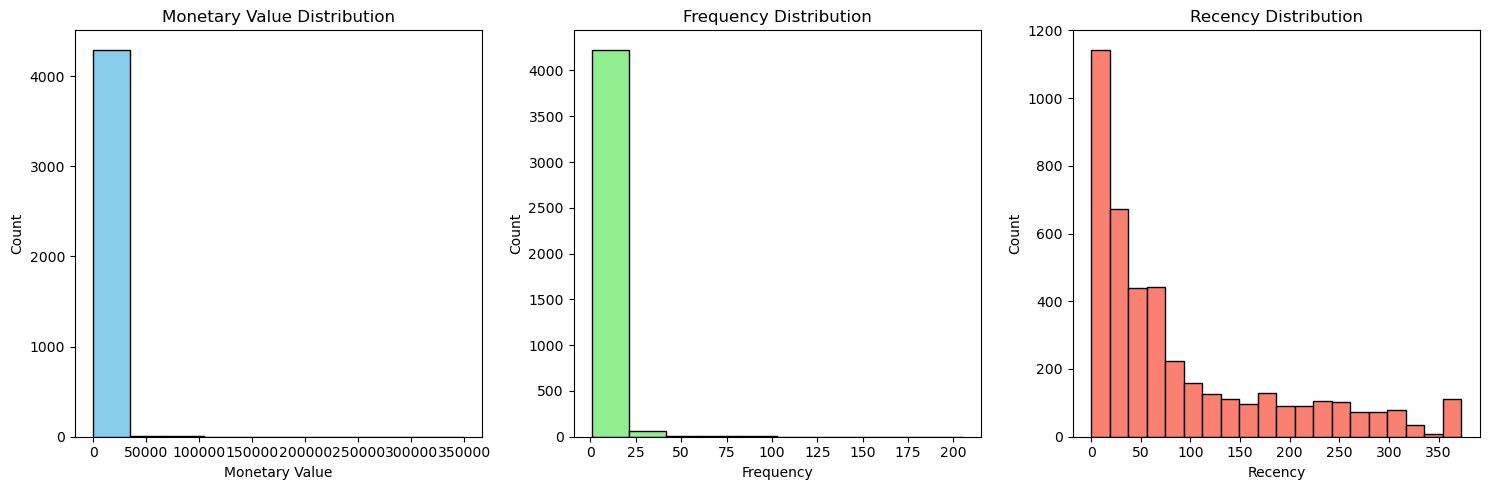

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

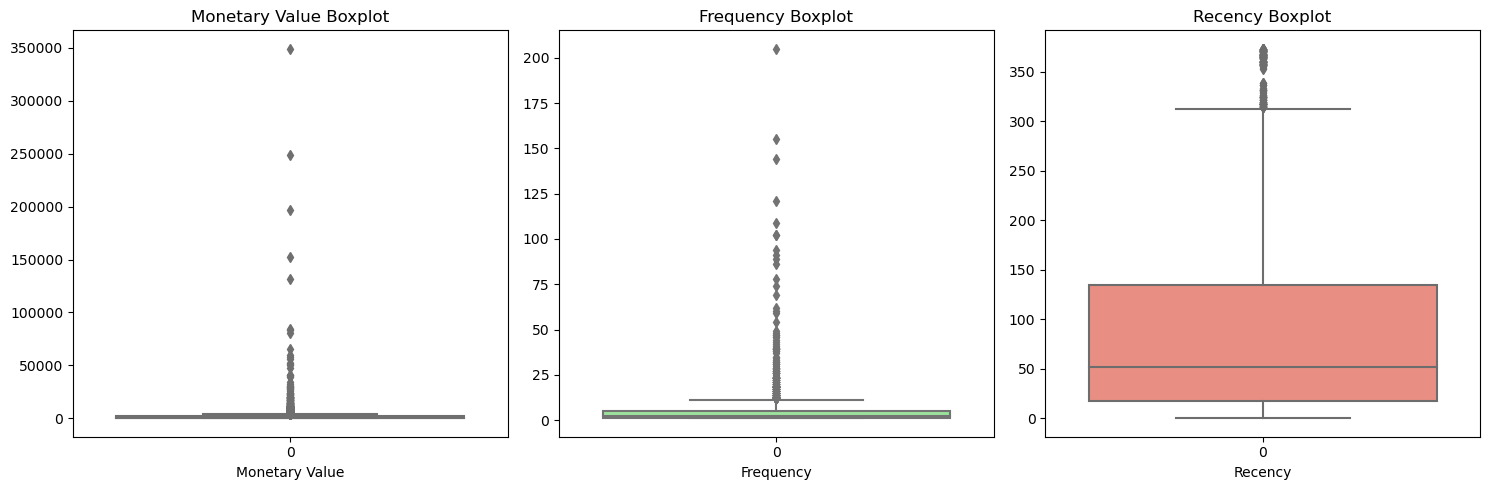

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data = aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [32]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_Outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_Outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,428.00,428.00,428.00,428.00
mean,15060.06,12319.51,17.28,29.88
std,1729.85,26044.46,20.49,49.23
min,12357.00,3851.01,1.00,0.00
25%,13573.00,4610.06,8.00,3.00
50%,14927.00,6262.58,12.00,13.00
75%,16653.00,10409.57,18.00,31.00
max,18260.00,349164.35,205.00,326.00


In [33]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_Outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_Outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,285.00,285.00,285.00,285.00
mean,15307.80,14374.58,23.91,15.97
std,1773.26,31518.80,22.83,25.78
min,12422.00,1094.39,12.00,0.00
25%,13715.00,4331.41,13.00,2.00
50%,15311.00,6507.67,17.00,7.00
75%,16814.00,11645.70,23.00,20.00
max,18260.00,349164.35,205.00,211.00


In [34]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_Outliers_df.index)) & (~aggregated_df.index.isin(frequency_Outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,3828.00,3828.00,3828.00,3828.00
mean,15372.74,889.86,2.86,97.91
std,1693.30,824.81,2.24,98.74
min,12346.00,2.95,1.00,0.00
25%,13910.50,281.21,1.00,22.00
50%,15380.50,589.13,2.00,58.00
75%,16846.25,1273.61,4.00,155.00
max,18287.00,3817.18,11.00,373.00


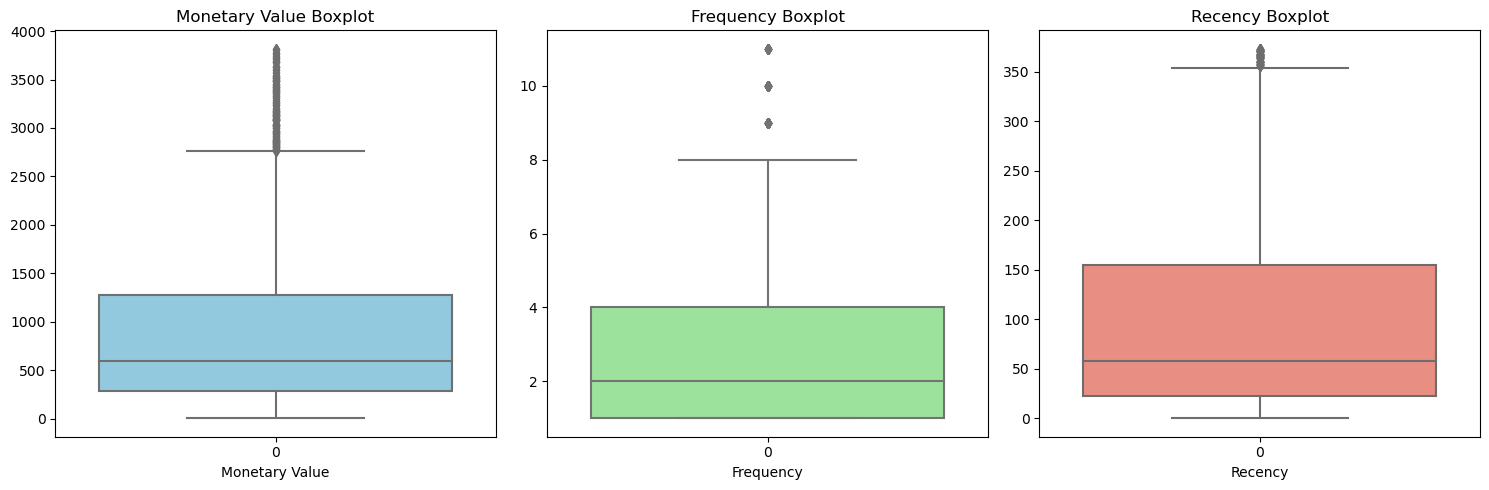

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data = non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

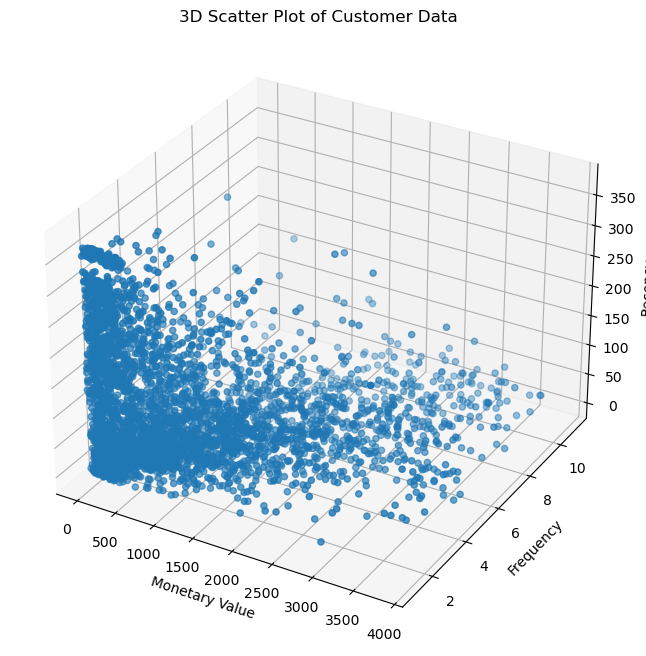

In [46]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()